<a href="https://colab.research.google.com/github/PhaneendraYedidi/Machine-Learning-Practices/blob/master/06_Implement_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from numpy.random import seed
from numpy.random import rand
from random import shuffle

In [2]:
X = load_boston().data
Y = load_boston().target

In [3]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [4]:
clf = SGDRegressor()
clf.fit(X, Y)
print(mean_squared_error(Y, clf.predict(X)))
print(clf.coef_)
print(clf.intercept_)

22.0668431182378
[-0.81646932  0.92536096 -0.08545325  0.72841832 -1.86426867  2.75014403
  0.0065551  -3.04273046  1.97089544 -1.2391609  -2.01382319  0.81714465
 -3.67488956]
[22.53555543]


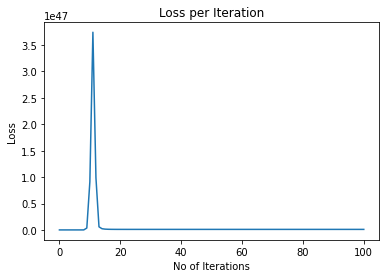

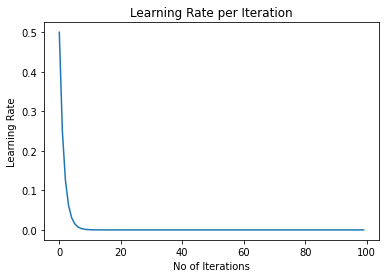

5.270453890741596e+45
[0.77770241 0.23754122 0.82427853 0.9657492  0.97260111 0.45344925
 0.60904246 0.77552651 0.64161334 0.72201823 0.03503652 0.29844947
 0.05851249]
0.8570609425871989


In [6]:
class SGDImplementation:
  def __init__(self):
    seed(13)
    self.lambda_Value = 1
    self.wOld = rand(13) # X is 13 dimensional
    #print(self.wOld)
    self.bOld = rand()
    #print(self.bOld)
    self.coef_ = self.wOld
    self.intercept_ = self.bOld

  def fit(self,X, Y):
    #Normalize the data
    scaler = preprocessing.StandardScaler().fit(X)
    X = scaler.transform(X)

    #Shuffle the data
    X,Y = self.randomShuffle(X,Y)

    #Set hyperparameters
    l = 0.5 # As per live video, 
    #l = 0.0001 # As per sklearn doc

    loss_List = [0]
    loss_Per_List = [0]
    l_list = []

    for i in range(100):
      l_list.append(l)
      X_Sam, Y_Sam = self.getBatchSamples(X,Y,10,i)
      wNew = self.wOld - (l*self.dldw(X_Sam,Y_Sam,self.wOld,self.bOld))
      bNew = self.bOld - (l*self.dldb(X_Sam,Y_Sam,self.wOld,self.bOld))
      lNew = self.lNew(X_Sam,Y_Sam,wNew,bNew)
      loss_Per = ((loss_List[-1] - lNew + 0.00001)/(loss_List[-1] + 0.00001)) * 100
      loss_List.append(lNew)
      loss_Per_List.append(loss_Per)
      #print('wNew')
      #print(wNew)
      #print('bNew')
      #print(bNew)
      self.wOld = wNew # useful for next iteration
      self.bOld = bNew

      # update learning rate
      l = self.updateL(l,i)
      #if loss_Per < 0.1:
      #  print('i',str(i))
      #  break
    
    plt.plot(loss_List)
    plt.xlabel('No of Iterations')
    plt.ylabel('Loss')
    plt.title('Loss per Iteration')
    plt.show()

    plt.plot(l_list)
    plt.xlabel('No of Iterations')
    plt.ylabel('Learning Rate')
    plt.title('Learning Rate per Iteration')
    plt.show()

    #return wOld, bOld

  def predict(self,X):
    #wOldT = (np.array([self.wOld])).T
    return X.dot(self.wOld) + self.bOld

  def randomShuffle(self,X,Y):
    #https://pynative.com/python-random-shuffle/
    dTrain = list(zip(X,Y))
    shuffle(dTrain)
    X_New, Y_New = zip(*dTrain)
    return X_New, Y_New
  
  def getBatchSamples(self,X,Y,k,i):
    #k - number of items to select
    #i - iteration number
    if i >= len(Y)/k: #if i*k is more than list of elements then modulus of  "i %= int(len(lis)/k)"" is used to select already selected values
      i %= int(len(Y)/k)
    dTrain = list(zip(X,Y))
    sample = dTrain[i*k: i*k+k]
    X_New, Y_New = zip(*dTrain)
    return np.array(X_New), np.array(Y_New)

  #Calculating the learning rate
  def updateL(self,l,i):
    #return 1/i #As per live session video
    return l/2 # As per assignment video

   #Calculating the new loss
  def lNew(self,X, Y, wOld, bOld):
    #X = dTrain['X'], Y= dTrain['Y']
    n = X.shape[0]
    LSum = 0
    for i in range(n):
      wOldT = (np.array([wOld])).T
      z = pow((Y[i]-(wOld.dot(X[i]) + bOld)),2) 
      LSum += z
    wSum = 0
    #for j in range(wOld.shape):
    #  wSum += pow(wOld[i],2)
    #LSum += wSum
    return LSum

  #Calculating the derivatives dldw and dldb
  def dldw(self,X, Y, wOld, bOld):
    #X = dTrain['X'], Y= dTrain['Y']
    n = X.shape[0]
    dldwSum = 0
    for i in range(n):
      #wOldT = (np.array([wOld])).T
      z = 2*(Y[i]-(wOld.dot(X[i]) + bOld))*(-X[i]) # + self.lambda_Value*(2*wOld)
      dldwSum += z
    return dldwSum

  def dldb(self,X, Y, wOld, bOld):
    #X = dTrain['X'], Y= dTrain['Y']
    n = X.shape[0]
    dldwSum = 0
    for i in range(n):
      #wOldT = (np.array([wOld])).T
      z = 2*(Y[i]-(wOld.dot(X[i]) + bOld))*(-1)
      dldwSum += z
    return dldwSum

X = load_boston().data
Y = load_boston().target
clf_Own = SGDImplementation()
clf_Own.fit(X, Y)
print(mean_squared_error(Y, clf_Own.predict(X)))
print(clf_Own.coef_)
print(clf_Own.intercept_)

In [ ]:
#Calculating the derivatives dldw and dldb
lambda_Value = 1
def dldw(X, Y, wOld, bOld):
  #X = dTrain['X'], Y= dTrain['Y']
  n = X.shape[0]
  dldwSum = 0
  for i in range(n):
    wOldT = (np.array([wOld])).T
    z = 2*(Y[i]-(wOld.dot(X[i]) + bOld))(-X[i]) # + lambda_Value*(2*wOld)
    dldwSum += z
  return dldwSum

def dldb(X, Y, wOld, bOld):
  #X = dTrain['X'], Y= dTrain['Y']
  n = X.shape[0]
  dldwSum = 0
  for i in range(n):
    wOldT = (np.array([wOld])).T
    z = 2*(Y[i]-(wOld.dot(X[i]) + bOld))(-1)
    dldwSum += z
  return dldwSum

In [ ]:
#Calculating the new loss
def lNew(X, Y, wOld, bOld):
  #X = dTrain['X'], Y= dTrain['Y']
  n = X.shape[0]
  LSum = 0
  for i in range(n):
    wOldT = (np.array([wOld])).T
    z = pow((Y[i]-(wOld.dot(X[i]) + bOld)),2) 
    LSum += z
  wSum = 0
  #for j in range(wOld.shape):
  #  wSum += pow(wOld[i],2)
  #LSum += wSum
  return LSum

In [ ]:
#Calculating the learning rate
def updateL(l,i):
  #return 1/i #As per live session video
  return l/2 # As per assignment video

In [ ]:
def randomShuffle(X,Y):
  #https://pynative.com/python-random-shuffle/
  dTrain = list(zip(X,Y))
  shuffle(dTrain)
  X_New, Y_New = zip(*dTrain)
  return X_New, Y_New
  
def getBatchSamples(X,Y,k,i):
  #k - number of items to select
  #i - iteration number
  if i >= len(lis)/k: #if i*k is more than list of elements then modulus of  "i %= int(len(lis)/k)"" is used to select already selected values
    i %= int(len(lis)/k)
  dTrain = list(zip(X,Y))
  sample = dTrain[i*k: i*k+k]
  X_New, Y_New = zip(*dTrain)
  return X_New, Y_New

In [ ]:
def computeSGD(X, Y):
  #Normalize the data
  scaler = preprocessing.StandardScaler().fit(X)
  X = scaler.transform(X)

  #Shuffle the data
  X,Y = randomShuffle(X,Y)

  #Set hyperparameters
  l = 0.5 # As per live video, 
  #l = 0.0001 # As per sklearn doc

  #initializing the w and b
  seed(13)
  wOld = rand(13) # X is 13 dimensional
  bOld = rand()
  loss_List = []
  loss_Per_List = []
  l_list = []

  for i in range(100):
    l_list.append(l)
    X_Sam, Y_Sam = getBatchSamples(X,Y,10,i):
    wNew = wOld - (l*dldw(X_Sam,Y_Sam,wOld,bOld))
    bNew = bNew - (b*dldb(X_Sam,Y_Sam,wOld,bOld))
    lNew = lNew(X_Sam,Y_Sam,wNew,bNew)
    loss_Per = ((loss_List[-1] - lNew)/loss_List[-1]) * 100
    loss_List.append(lNew)
    loss_Per_List.append(loss_Per)
    wOld = wNew # useful for next iteration
    bOld = BNew
    # update learning rate
    l = updateL(l,i)
    if loss_Per < 0.1:
      break
  
  plt.plot(loss_List)
  plt.xlabel('No of Iterations')
  plt.ylabel('Loss')
  plt.title('Loss per Iteration')
  plt.show()

  plt.plot(l_list)
  plt.xlabel('No of Iterations')
  plt.ylabel('Learning Rate')
  plt.title('Learning Rate per Iteration')
  plt.show()

  return wOld, bOld

In [ ]:
def predict(X, wOld, bOld):
  wOldT = (np.array([wOld])).T
  return wOldT.dot(X[i]) + bOld)

In [ ]:
'''
Implement your own version of sklearn SGDRegresser (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)
Plot a chart of predicted values Vs actual values of your own SGD Implementation
Now try out the SGDRegresser of sklearn and plot the chart of predicted values Vs actual values
In a tabular format, compare the weights obtained from your own implementation with the weights obtained after applying sklearn's SGDRegresser.
Also compare the MSE obtained from your custom implementation of SGDRegressor and that of sklearns implementation.
Try to get the weights & MSE of your custom implementation, similar to the weights and MSE of sklearns implementation.
'''